In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Context
Since as a beginner in machine learning it would be a great opportunity to try some techniques to predict the outcome of the drugs that might be accurate for the patient.

 


### Inspiration
The main problem here in not just the feature sets and target sets but also the approach that is taken in solving these types of problems as a beginner. So best of luck.

In [39]:
df = pd.read_csv('drug200.csv')

In [40]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Feature Enginnering

In [49]:
from sklearn.model_selection import train_test_split

In [63]:
obj = df.select_dtypes(include='object').drop('Drug',axis=1)

In [64]:
num = df.select_dtypes(exclude='object')

In [65]:
obj = pd.get_dummies(obj,drop_first=True)

In [66]:
dff = pd.concat([obj,num],axis=1)

In [71]:
dff = pd.concat([dff,df['Drug']],axis=1)

# train test split

In [72]:
X = dff.drop('Drug',axis=1)

In [73]:
y = dff['Drug']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model training

In [48]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
model = RandomForestClassifier(n_estimators=150,max_depth=5,min_impurity_decrease=0.001)

In [76]:
model.fit(X_train,y_train)
p = model.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix

In [78]:
confusion_matrix(y_test,p)

array([[29,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0, 19]], dtype=int64)

In [80]:
accuracy_score(y_test,p)

1.0

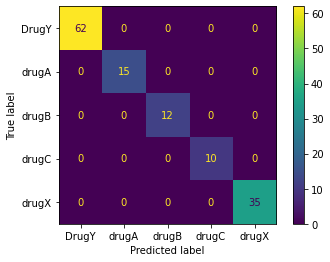

In [82]:
plot_confusion_matrix(model,X_train,y_train)